In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

# Load the pretrained model fcn_resenet101 for semantic segmentation
# trained on COCO dataset



In [2]:
import torch
import torchvision
import torchvision.models as models

In [3]:
dir(torchvision.models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [4]:
dir(torchvision.models.segmentation)

['DeepLabV3',
 'FCN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'deeplabv3',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'fcn',
 'fcn_resnet101',
 'fcn_resnet50',
 'segmentation']

## Saving and Loading Model Weights
PyTorch models store the learned parameters in an internal
state dictionary, called ``state_dict``. These can be persisted via the ``torch.save``
method:



In [6]:
from torchvision.models.segmentation import fcn, fcn_resnet50, fcn_resnet101
help(fcn_resnet101)

Help on function fcn_resnet101 in module torchvision.models.segmentation.segmentation:

fcn_resnet101(pretrained=False, progress=True, num_classes=21, aux_loss=None, **kwargs)
    Constructs a Fully-Convolutional Network model with a ResNet-101 backbone.
    
    Args:
        pretrained (bool): If True, returns a model pre-trained on COCO train2017 which
            contains the same classes as Pascal VOC
        progress (bool): If True, displays a progress bar of the download to stderr



In [7]:
from torchvision.transforms.functional import to_pil_image

# Step 1: Initialize model with the best available weights
model = fcn_resnet101(pretrained=True)
model.eval()
print(model)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/pwrai/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:08<00:00, 20.6MB/s] 
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /home/pwrai/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:10<00:00, 20.7MB/s] 


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [8]:
print(dir(model))
#print(dir(model._parameters.items()))
for key, value in model.named_parameters():
    print(key)

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backend', '_backward_hooks', '_buffers', '_construct', '_forward_hooks', '_forward_pre_hooks', '_get_name', '_load_from_state_dict', '_load_state_dict_pre_hooks', '_modules', '_named_members', '_parameters', '_register_load_state_dict_pre_hook', '_register_state_dict_hook', '_save_to_state_dict', '_slow_forward', '_state_dict_hooks', '_tracing_name', '_version', 'add_module', 'apply', 'aux_classifier', 'backbone', 'buffers', 'children', 'classifier', 'cpu', 'cuda', 'double', 'dump_patches', 'eval', 'extra_repr', 'float', 'forward', 'half', 'load_state_dict', 'modules', 'named_buffers', 'named_

In [17]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "./deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
#filename = "./tiger.jpg"

input shape: torch.Size([3, 183, 275])
batch shape: torch.Size([1, 3, 183, 275])
output shape: torch.Size([21, 183, 275])
output_predictions shape: torch.Size([183, 275])


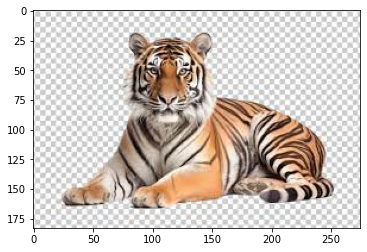

In [21]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)
input_image = input_image.convert("RGB")

import matplotlib.pyplot as plt
plt.imshow(input_image)

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
print(f"input shape: {input_tensor.shape}")
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print(f"batch shape: {input_batch.shape}")

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
    
print(f"output shape: {output.shape}")
output_predictions = output.argmax(0)
print(f"output_predictions shape: {output_predictions.shape}")

torch.Size([21, 3])
tensor(8, device='cuda:0') tensor(0, device='cuda:0')


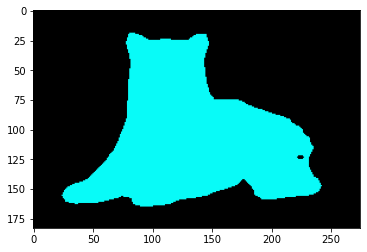

In [22]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
print(colors.shape)
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
print(output_predictions.max(), output_predictions.min())
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
# plt.show()

In [112]:
#Exercises on semantic segmentation using pretrained models
#1. Verify with custom images containing common 21 classes
#2. try with images not part of this classes
#3. Use DeepLabv3 models for semantic segmentation
#4. train the pretrained models using transfer learning.